# Python 與機器學習

## 郭耀仁

## Scikit-Learn

- 用來實作資料探勘與機器學習的 Python 套件
- 建構於 NumPy，SciPy 與 Matplotlib 套件之上
- 有[六大功能模組](http://scikit-learn.org/stable/index.html)：
    - 預處理
    - 降維
    - 迴歸
    - 分群
    - 分類
    - 模型評估

## Scikit-Learn（2）

- [其他的 Scikits](https://scikits.appspot.com/scikits)
- [Scikit-Learn 機器學習地圖](http://scikit-learn.org/stable/tutorial/machine_learning_map/)

## Hello worlds

- 玩具資料集的 Hello world
- 機器學習的 Hello world

## 玩具資料集的 Hello world

- [iris 資料集](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris)
- [digits 資料集](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits)
- [MNIST 資料集](http://yann.lecun.com/exdb/mnist/)

## 玩具資料集的 Hello world（2）

- iris 資料集

```python
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.target)
print(iris.data)
print(iris.target_names)
```

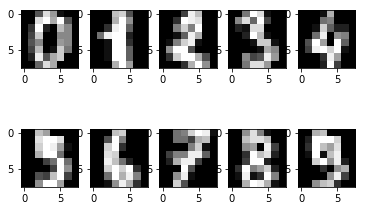

In [1]:
# 玩具資料集的 Hello world（3）
# digits 資料集

from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[i], cmap = "gray")
plt.show()

## 玩具資料集的 Hello world（4）

- MNIST 資料集
- 安裝 keras（包含 tensorflow） 或 tensorflow

```
$ conda install -c conda-forge keras=2.0.2
```

```
$ conda install -c conda-forge tensorflow
```

## 玩具資料集的 Hello world（5）

- MNIST 資料集
- 用 keras 讀入：

```python
from keras.datasets import mnist
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data() # /~/.keras/datasets/mnist.npz
plt.imshow(x_train[0], cmap = 'gray')
plt.show()
print(x_train.shape)
```

Source: [Keras Documentation](https://keras.io/datasets/)

## 玩具資料集的 Hello world（6）

- MNIST 資料集
- 用 tensorflow 讀入：

```python
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)
x_train = mnist.train.images
print(x_train.shape)
x_train_reshaped = np.reshape(x_train, (55000, 28, 28))
plt.imshow(x_train_reshaped[0], cmap = "gray")
plt.show()
```

Source: [MNIST For ML Beginners](https://www.tensorflow.org/versions/r0.10/tutorials/mnist/beginners/)

Using TensorFlow backend.


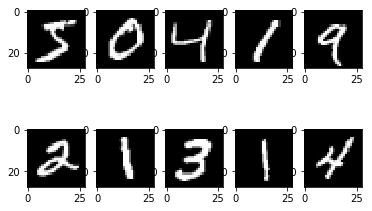

In [2]:
# 玩具資料集的 Hello world（7）
# 看 10 張

from keras.datasets import mnist
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data() # /~/.keras/datasets/mnist.npz
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap = 'gray')
plt.show()

## 機器學習的 Hello world

- [感知器學習（Perceptron Learning）](https://www.youtube.com/watch?v=WlpF1Phkv28&list=PLXVfgk9fNX2I7tB6oIINGBmW50rrmFTqf&index=6)
- 決策邊界圖（Decision Boundary Plot）

![decison_boundary_plot](https://storage.googleapis.com/py_ml_images/svc_kernel_iris_plot.png)

## 感知器學習

![Perceptron Learning](https://storage.googleapis.com/py_ml_images/ppn.png)

## 感知器學習（2）

$$z = w_1x_1 + ... + w_mx_m$$

$$
    \hat{y} = \phi(z) =
    \begin{cases}
        1       & \quad \text{if } z\geq\theta\\
    -1  & \quad \text{ohterwise.}\\
    \end{cases}
$$

## 感知器學習（3）

- 令 $w_0 = -\theta$且$x_0 = 1$

$$z = w_0x_0 + w_1x_1 + ... + w_mx_m = w^Tx$$


$$
    \hat{y} = \phi(z) =
    \begin{cases}
        1       & \quad \text{if } z\geq 0\\
    -1  & \quad \text{ohterwise.}\\
    \end{cases}
$$

### 感知器學習（4）

- 初始一個很小趨近於零的值給權重 $w$
- 利用真實答案 $y_i$ 與預測結果 $\hat{y_i}$ 的誤差更新權重 $w$

$$w_i:=w_i + \Delta w_i$$

$$\Delta w_i = \eta(y_i - \hat{y_i})x_i$$

### 感知器學習（5）

- 正確的預測感知器不會修正權重 $w$

$$\Delta w_i = \eta (1 - 1)x_i = 0$$
$$\Delta w_i = \eta (-1 - (-1))x_i = 0$$

- 錯誤的預測會讓感知器修正權重 $w$ 藉此修正下一輪的預測結果

$$\Delta w_i = \eta (1 - (-1))x_i = \eta (2) x_i$$
$$\Delta w_i = \eta (-1 - 1)x_i = \eta (-2) x_i$$

In [87]:
# 感知器學習（6）
# 建立一個 Perceptron 類別

import numpy as np

class Perceptron:
    def __init__(self, eta, n_epoch):
        self.eta = eta
        self.n_epoch = n_epoch
        
    def fit(self, X, y):
        self.weights = np.zeros(1 + X.shape[1]) # 1 給 w_0, X.shape[1] 給 w_1~w_n
        self.errors = []
        
        for i in range(self.n_epoch):
            error = 0
            for x, target in zip(X, y):
                delta_w = self.eta * (target - self.predict(x))
                self.weights[1:] += delta_w * x
                self.weights[0] += delta_w
                error += (delta_w != 0) # delta_w 太小，改以 boolean 判斷
            self.errors.append(error)
        return self
    
    def net_input(self, X):
        return np.dot(self.weights[1:], X.T) + self.weights[0] # (1, 2) dot (2, 100)
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0, 1, -1) # Activation Function here

## 感知器學習（7）

- 試用感知器分割 `iris` 資料集的 `setosa` 與 `versicolor`

```python
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
x1_setosa, x2_setosa = X[:50, 0], X[:50, 2]
x1_versicolor, x2_versicolor = X[50:100, 0], X[50:100, 2]

plt.scatter(x = x1_setosa, y = x2_setosa, marker = "o", color = "red", label = "setosa")
plt.scatter(x = x1_versicolor, y = x2_versicolor, marker = "x", color = "green", label = "versicolor")
plt.legend(loc = "upper left")
plt.show()
```

In [88]:
# 感知器學習（8）
import numpy as np
from sklearn.datasets import load_iris

# Perceptron here
# ...

iris = load_iris()
X = iris.data[:100, [0, 2]]
y = iris.target[:100]
y = np.where(y == 0, -1, 1)
ppn = Perceptron(eta = 0.01, n_epoch = 10)
ppn.fit(X, y)
print(ppn.errors)

[2, 2, 3, 2, 1, 0, 0, 0, 0, 0]


## 決策邊界圖

- 利用繪製等高線圖（填滿）的方法

In [100]:
# 決策邊界圖（2）
from matplotlib.colors import ListedColormap

def plot_decision_boundary(X, y, classifier, resolution=0.02):
    markers = ('o', 'x')
    colors = ('red', 'green')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                     np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], c = cmap(idx), marker = markers[idx], label = cl)

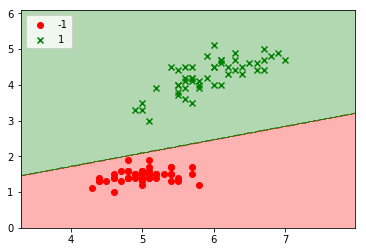

In [101]:
# 決策邊界圖（3）
plot_decision_boundary(X, y, classifier = ppn)
plt.legend(loc = "upper left")
plt.show()